# MASTER - Notebook 1
### Matteo Grazioso 884055

In [100]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

import myfunctions as mf # Custom functions

In [101]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [102]:
# Find all txt files in the data folder
txt_files = mf.find_txt_files("data/raw")

# Choose a dataset from the list of txt files
selected_dataset = mf.choose_dataset(txt_files)

if selected_dataset:
    print(f"You selected the dataset {selected_dataset}")
else:
    print("No dataset selected.")

path  = selected_dataset

The following TXT files were found:
1. data/raw/0-export.txt
2. data/raw/1-validazioni.txt
3. data/raw/2-esportazioneCompleta.txt
4. data/raw/3-esportazionePasqua23.txt
You selected the dataset data/raw/3-esportazionePasqua23.txt


In [103]:
# The file contain the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file 
# path = 'data/raw/1-validazioni.txt'                     # Period: 2022-05-13 to 2022-07-15
# path = 'data/raw/2-esportazioneCompleta.txt'            # Period: 2023-01-23 to 2023-03-14
# path = 'data/raw/3-esportazionePasqua23.txt'            # Period: 2023-04-04 to 2023-06-03

df = pd.read_csv(path, header=0, sep='\t')
# Save the name of the file in a variable for future use extracting the name of the file from the path
file_name = path.split('/')[-1].split('.')[0]
# Remove the number and the - character from the head of the file name
file_name = file_name [file_name.find('-')+1:]


In [104]:
file_name

'esportazionePasqua23'

In [105]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,04/04/2023 00:00,-2854957894,5032,"Ferrovia ""B""",11209,Bigl RETE UNICA 75'
1,04/04/2023 00:00,-2854992707,5032,"Ferrovia ""B""",23101,Mensile ordinario Rete Unica
2,04/04/2023 00:00,-2821778289,5022,Giudecca Pal,23101,Mensile ordinario Rete Unica
3,04/04/2023 00:00,-3613120484,5028,"P.le Roma ""E",23301,Mens.Studente Rete Unica
4,04/04/2023 00:00,-3604951458,5028,"P.le Roma ""E",23301,Mens.Studente Rete Unica


In [106]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
8644442,03/06/2023 23:59,-3613117827,5049,"Zattere ""B""",11209,Bigl RETE UNICA 75'
8644443,03/06/2023 23:59,65694191815653125,506,VENEZIA,12101,Bigl.Aut.75'Mestre/Lido-tsc
8644444,03/06/2023 23:59,65694191809363717,506,VENEZIA,12101,Bigl.Aut.75'Mestre/Lido-tsc
8644445,03/06/2023 23:59,65694191809363205,506,VENEZIA,12101,Bigl.Aut.75'Mestre/Lido-tsc
8644446,03/06/2023 23:59,-2824236012,5032,"Ferrovia ""B""",20003,Mensile ORDINARIO ISOLE


In [107]:
# Create a subset of the data with the first 10% of the rows and the last 10% of the rows
# df = df.iloc[:int(len(df)*0.1),:]
# df = df.append(df.iloc[-int(len(df)*0.1):,:])


In [108]:
# Divide the dataset into 2 parts but notice that the minimm temporal gap between the last row of the first part and the first row of the second part must be at least 10 minutes
# The minimm temporal gap can be obtained by: df = df.groupby(['SERIALE','DATA', 'DESCRIZIONE']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))

# Divide the dataset into 2 parts
df1 = df.iloc[:int(len(df)*0.5),:]
df2 = df.iloc[int(len(df)*0.5):,:]

## Explorative Data Analysis


In [109]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
# df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2023-04-04,00:00:00,04/04/2023 00:00,-2854957894,5032,"Ferrovia ""B""",11209,Bigl RETE UNICA 75'
1,2023-04-04,00:00:00,04/04/2023 00:00,-2854992707,5032,"Ferrovia ""B""",23101,Mensile ordinario Rete Unica
2,2023-04-04,00:00:00,04/04/2023 00:00,-2821778289,5022,Giudecca Pal,23101,Mensile ordinario Rete Unica
3,2023-04-04,00:00:00,04/04/2023 00:00,-3613120484,5028,"P.le Roma ""E",23301,Mens.Studente Rete Unica
4,2023-04-04,00:00:00,04/04/2023 00:00,-3604951458,5028,"P.le Roma ""E",23301,Mens.Studente Rete Unica


In [110]:
# Set the format of the timestamp
df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'], format='%d/%m/%Y %H:%M')

In [111]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2023-04-04 00:00:00 00:00:00
Last validation:  2023-05-04 00:00:00 23:59:00
Number of Serial numbers:  1246588
Number of validation:  4322223
Number of tickets:  305
Number of titolo:  306
Number of FERMATA:  1699
Number of DESCRIZIONE:  933


In [112]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

Bigl RETE UNICA 75'              657872
DailyP-Tpl19,90-C.Ve5,10         575199
Mensile ordinario Rete Unica     423151
75'-Tpl 8,64-ComVe0,86           419825
48h-Tpl 29,90-ComVe5,10          328735
72h-Tpl 38,40-ComVe6,60          257485
Bigl.Aut.75'Mestre/Lido-tsc      246508
Annuale ordinario Rete Unica     167076
7gg-Tpl 48,60-ComVe16,40         138528
Biglietto 72 ore Roll. Venice     81161
Name: DESCRIZIONE_TITOLO, dtype: int64

In [113]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2023-04-08  16:41:00    377
2023-04-09  11:31:00    372
2023-04-08  16:01:00    370
            10:28:00    369
2023-04-23  11:29:00    365
2023-04-08  16:32:00    363
2023-04-07  11:10:00    362
2023-04-30  16:02:00    361
2023-04-23  11:30:00    360
2023-04-30  16:03:00    356
Name: SERIALE, dtype: int64

In [114]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

Lido S.M.E.     312841
P.le Roma "G    235790
San Marco-Sa    211481
Rialto "C"      199564
VENEZIA         187844
Burano "C"      183106
S. Marco-San    149693
Ferrovia "B"    129537
P.le Roma "E    117668
Punta Sabbio     95315
Name: DESCRIZIONE, dtype: int64

## Categories

In [115]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:

**1.** One-day ticket

**2.** Two-day ticket

**3.** Three-day ticket

**4.** Weekly ticket (Seven-day ticket)

**5.** Monthly ticket

**5-STUD.** Monthly ticket for students

**5-RET.** Monthly ticket for retirees

**5-WKRS.** Monthly ticket for workers

**6.** Annual ticket

**6-STUD.** Annual ticket for students

**6-RET.** Annual ticket for retirees

**6-WKRS.** Annual ticket for workers

**7.** 75 minutes ticket

**8.** Other ticket (if it is necessary to add other types of tickets)

In [116]:
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO
0,2023-04-04,00:00:00,2023-04-04,-2854957894,5032,"Ferrovia ""B""",11209,TBD,Bigl RETE UNICA 75'
1,2023-04-04,00:00:00,2023-04-04,-2854992707,5032,"Ferrovia ""B""",23101,TBD,Mensile ordinario Rete Unica
2,2023-04-04,00:00:00,2023-04-04,-2821778289,5022,Giudecca Pal,23101,TBD,Mensile ordinario Rete Unica
3,2023-04-04,00:00:00,2023-04-04,-3613120484,5028,"P.le Roma ""E",23301,TBD,Mens.Studente Rete Unica
4,2023-04-04,00:00:00,2023-04-04,-3604951458,5028,"P.le Roma ""E",23301,TBD,Mens.Studente Rete Unica


In [117]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', 
                '5': 'Monthly ticket', '5-STUD': 'Monthly ticket for students',
                '5-RET': 'Monthly ticket for retired', '5-WKRS': 'Monthly ticket for workers',
                '6': 'Annual ticket', '6-STUD': 'Annual ticket for students', '6-RET': 'Annual ticket for retired',
                '6-WKRS': 'Annual ticket for workers',
                '7': '75 minutes ticket', '8': 'Other ticket'}

# Export the dictionary to a json file
with open('data/dictionaries/dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [118]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

305

In [119]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(["Bigl RETE UNICA 75'", 'Mensile ordinario Rete Unica',
       'Mens.Studente Rete Unica', 'Bigl Aer-Venezia TSC',
       'Annuale ordinario Rete Unica', 'Libera circ. DUE RETI',
       'Abb stud. ReteUnica 12 mesi ', 'DailyP-Tpl19,90-C.Ve5,10',
       '48h online aerobus CS 1 mese', 'Abb. over75 GRATUITO',
       'Mensile ORDINARIO ISOLE', "75'-Tpl 8,64-ComVe0,86",
       "Bigl.Aut.75'Mestre/Lido-tsc", "75'-Tpl 6,64-ComVe0,86",
       '72h-Tpl 38,40-ComVe6,60', '72 ore R.Venice+aeroporto AR',
       "Bigl.Mestre/Lido 75' a bordo", 'Libera circ. RETE intera',
       'Mensile Ordinario extra', '48h-Tpl 29,90-ComVe5,10',
       'Traghetto Carta Venezia', 'Linea 17-categoria D',
       'Annuale ORDINARIO ISOLE', 'Aeroporto-Venezia AR',
       'Aeroporto-Venezia AR ONLINE', 'Biglietto 72 ore Roll. Venice',
       'Linea 11+17 categoria C', 'Linea 11-categoria B',
       'Linea 11-categoria D', 'Linea 11-categoria C',
       "ord. navigazione 75' online", 'Tessera di servizio ACTV',
 

In [120]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  305


In [121]:
# Convert the column 'DESCRIZIONE_TITOLO' into upper case 
df['DESCRIZIONE_TITOLO'] = df['DESCRIZIONE_TITOLO'].str.upper()
# Count the number of unique values of the column 'DESCRIZIONE_TITOLO'
df['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               657872
DAILYP-TPL19,90-C.VE5,10          575199
MENSILE ORDINARIO RETE UNICA      423151
75'-TPL 8,64-COMVE0,86            419825
48H-TPL 29,90-COMVE5,10           328735
72H-TPL 38,40-COMVE6,60           257485
BIGL.AUT.75'MESTRE/LIDO-TSC       246508
ANNUALE ORDINARIO RETE UNICA      167076
7GG-TPL 48,60-COMVE16,40          138528
BIGLIETTO 72 ORE ROLL. VENICE      81161
72ORE ONLINE NO AEROBUS            72563
MENS.STUDENTE RETE UNICA           59748
7 DAYS ONLINE NO AEROBUS           57004
PEOPLEMOVER+BUS+TRAM 75'           51662
MENSILE ORDINARIO ISOLE            51645
ANNUALE ORDINARIO ISOLE            47797
72 ORE R.VENICE ONLINE             45641
48ORE ONLINE NO AEROBUS            45043
ABB STUD. RETEUNICA 12 MESI        32880
BIGL AER-VENEZIA TSC               32292
DAILY PASS VENEZIA ONLINE          28006
ABB. RETE INTERA A20               27043
MOBILITY ORDINARIO RETE UNICA      22632
TESSERA DI SERVIZIO ACTV           19915
EXTRA TRATTA 2  

### One-day tickets

In [122]:
# Which type of ticket are one-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY')]['DESCRIZIONE_TITOLO'].value_counts()

DAILYP-TPL19,90-C.VE5,10          575199
DAILY PASS VENEZIA ONLINE          28006
24HAERCS-TPL26,90-CVE5,10           4137
T.FUSINA VE+ACTV 24 ORE             3134
CAV -TREP + ACTV 24H                2650
DAILY PASS VE. ONLINE 1MESE         2243
JESOLO + ACTV 24H                   2066
24ORE ONLINE AEROBUS CS              371
24HAERAR-TPL32,90-CVE5,10            361
24H ONLINE AEROBUS CS 1 MESE         167
24H-24 ORE                           144
24ORE ONLINE NO AEROBUS              138
24ORE ONLINE AEROBUS AR               92
24H ONLINE AEROBUS AR 1 MESE          43
ARRIVA MISTO ACTV 24H                 14
VILLE V+24H TPL28,50 C.VE 5,10        10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [123]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY'), 'TICKET_CODE'] = '1'

In [124]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  618775
The number of tickets for each type of one-day ticket is: 


DAILYP-TPL19,90-C.VE5,10          575199
DAILY PASS VENEZIA ONLINE          28006
24HAERCS-TPL26,90-CVE5,10           4137
T.FUSINA VE+ACTV 24 ORE             3134
CAV -TREP + ACTV 24H                2650
DAILY PASS VE. ONLINE 1MESE         2243
JESOLO + ACTV 24H                   2066
24ORE ONLINE AEROBUS CS              371
24HAERAR-TPL32,90-CVE5,10            361
24H ONLINE AEROBUS CS 1 MESE         167
24H-24 ORE                           144
24ORE ONLINE NO AEROBUS              138
24ORE ONLINE AEROBUS AR               92
24H ONLINE AEROBUS AR 1 MESE          43
ARRIVA MISTO ACTV 24H                 14
VILLE V+24H TPL28,50 C.VE 5,10        10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [125]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H ONLINE AEROBUS AR 1 MESE,7.0,6.142857,0.377964,6.0,6.0,6.0,6.00,7.0
24H ONLINE AEROBUS CS 1 MESE,46.0,3.630435,2.003982,2.0,2.0,3.0,5.00,9.0
24H-24 ORE,65.0,2.215385,1.023052,1.0,1.0,2.0,3.00,5.0
"24HAERAR-TPL32,90-CVE5,10",94.0,3.840426,2.653070,1.0,1.0,3.0,5.00,11.0
"24HAERCS-TPL26,90-CVE5,10",923.0,4.482124,2.736920,1.0,2.0,4.0,6.00,19.0
24ORE ONLINE AEROBUS AR,19.0,4.842105,4.045068,1.0,1.0,4.0,8.50,12.0
24ORE ONLINE AEROBUS CS,79.0,4.696203,2.834560,1.0,3.0,4.0,6.50,14.0
24ORE ONLINE NO AEROBUS,50.0,2.760000,1.333401,1.0,2.0,2.0,3.75,6.0
ARRIVA MISTO ACTV 24H,2.0,7.000000,0.000000,7.0,7.0,7.0,7.00,7.0


### Two days tickets

In [126]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

48H-TPL 29,90-COMVE5,10         328735
48ORE ONLINE NO AEROBUS          45043
48H ONLINE NO AEROBUS 1MESE       5093
48HAERCS-TPL36,90-CVE5,10         4903
48HAERAR-TPL42,90-CVE5,10         1706
48ORE ONLINE AEROBUS CS           1014
48H ONLINE AEROBUS CS 1 MESE       675
48ORE ONLINE AEROBUS AR            467
48H ONLINE AEROBUS AR 1 MESE       107
Name: DESCRIZIONE_TITOLO, dtype: int64

In [127]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE'), 'TICKET_CODE'] = '2'

In [128]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  387743
The number of tickets for each type of two-day ticket is: 


48H-TPL 29,90-COMVE5,10         328735
48ORE ONLINE NO AEROBUS          45043
48H ONLINE NO AEROBUS 1MESE       5093
48HAERCS-TPL36,90-CVE5,10         4903
48HAERAR-TPL42,90-CVE5,10         1706
48ORE ONLINE AEROBUS CS           1014
48H ONLINE AEROBUS CS 1 MESE       675
48ORE ONLINE AEROBUS AR            467
48H ONLINE AEROBUS AR 1 MESE       107
Name: DESCRIZIONE_TITOLO, dtype: int64

In [129]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
48H ONLINE AEROBUS AR 1 MESE,16.0,6.687500,2.495830,3.0,5.0,6.0,8.25,11.0
48H ONLINE AEROBUS CS 1 MESE,96.0,7.031250,2.932407,1.0,5.0,7.0,9.00,12.0
48H ONLINE NO AEROBUS 1MESE,744.0,6.845430,3.554465,1.0,4.0,7.0,9.00,20.0
"48H-TPL 29,90-COMVE5,10",49869.0,6.591971,3.558091,1.0,4.0,6.0,9.00,74.0
"48HAERAR-TPL42,90-CVE5,10",213.0,8.009390,4.304441,1.0,5.0,8.0,10.00,23.0
"48HAERCS-TPL36,90-CVE5,10",609.0,8.050903,4.074032,1.0,5.0,8.0,11.00,23.0
48ORE ONLINE AEROBUS AR,61.0,7.655738,4.162873,1.0,4.0,8.0,9.00,19.0
48ORE ONLINE AEROBUS CS,139.0,7.294964,3.721176,1.0,5.0,7.0,10.00,19.0
48ORE ONLINE NO AEROBUS,7161.0,6.290043,3.290085,1.0,4.0,6.0,8.00,35.0


### Three days tickets

In [130]:
# Which type of ticket are three-day tickets and how many are there?
# Do not consider the ticket that contains also 75
df[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

72H-TPL 38,40-COMVE6,60           257485
BIGLIETTO 72 ORE ROLL. VENICE      81161
72ORE ONLINE NO AEROBUS            72563
72 ORE R.VENICE ONLINE             45641
72H ONLINE NO AEROBUS 1MESE        11206
72H R.VENICE ONLINE 1 MESE         10311
72HAERCS-TPL45,40-CVE6,60           5802
72HAERAR-TPL51,40-CVE6,60           5467
72 ORE R.VENICE+AEROPORTO CS        4320
72ORE ONLINE AEROBUS AR             3408
72 ORE R.VENICE+AEROPORTO AR        2849
72H R.VENICE+AEROP.AR ONLINE        2484
72ORE ONLINE AEROBUS CS             2398
ATVO CANOVA+ACTV 72H ONLINE         2265
72H RVENICE+AEROP.CS ONLINE         2166
T.FUSINA VE+ACTV 72 ORE             1595
ATVOCANOVA+ACTV 72HROLL.ONLINE      1400
72H ONLINE AEROBUS AR 1 MESE        1073
72H RVE+AEROP.CS ONLINE 1 MESE       923
72H ONLINE AEROBUS CS 1 MESE         910
72H R.VE.+AER.AR ONLINE 1MESE        598
ATVO CANOVA+ACTV 72H                 567
CAV - TREP + ACTV 72H                306
Name: DESCRIZIONE_TITOLO, dtype: int64

In [131]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE'), 'TICKET_CODE'] = '3'

In [132]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  516898
The number of tickets for each type of three-day ticket is: 


72H-TPL 38,40-COMVE6,60           257485
BIGLIETTO 72 ORE ROLL. VENICE      81161
72ORE ONLINE NO AEROBUS            72563
72 ORE R.VENICE ONLINE             45641
72H ONLINE NO AEROBUS 1MESE        11206
72H R.VENICE ONLINE 1 MESE         10311
72HAERCS-TPL45,40-CVE6,60           5802
72HAERAR-TPL51,40-CVE6,60           5467
72 ORE R.VENICE+AEROPORTO CS        4320
72ORE ONLINE AEROBUS AR             3408
72 ORE R.VENICE+AEROPORTO AR        2849
72H R.VENICE+AEROP.AR ONLINE        2484
72ORE ONLINE AEROBUS CS             2398
ATVO CANOVA+ACTV 72H ONLINE         2265
72H RVENICE+AEROP.CS ONLINE         2166
T.FUSINA VE+ACTV 72 ORE             1595
ATVOCANOVA+ACTV 72HROLL.ONLINE      1400
72H ONLINE AEROBUS AR 1 MESE        1073
72H RVE+AEROP.CS ONLINE 1 MESE       923
72H ONLINE AEROBUS CS 1 MESE         910
72H R.VE.+AER.AR ONLINE 1MESE        598
ATVO CANOVA+ACTV 72H                 567
CAV - TREP + ACTV 72H                306
Name: DESCRIZIONE_TITOLO, dtype: int64

In [133]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ORE R.VENICE ONLINE,5491.0,8.311965,4.476870,1.0,5.00,8.0,11.0,39.0
72 ORE R.VENICE+AEROPORTO AR,271.0,10.512915,5.297695,1.0,7.00,10.0,13.0,43.0
72 ORE R.VENICE+AEROPORTO CS,455.0,9.494505,4.907007,1.0,6.00,9.0,13.0,28.0
72H ONLINE AEROBUS AR 1 MESE,99.0,10.838384,4.793080,2.0,7.00,10.0,14.0,20.0
72H ONLINE AEROBUS CS 1 MESE,95.0,9.578947,5.507401,1.0,6.00,9.0,12.0,27.0
72H ONLINE NO AEROBUS 1MESE,1238.0,9.051696,4.713171,1.0,6.00,9.0,12.0,35.0
72H R.VE.+AER.AR ONLINE 1MESE,52.0,11.500000,4.491823,3.0,8.75,11.0,14.0,23.0
72H R.VENICE ONLINE 1 MESE,1237.0,8.335489,4.533387,1.0,5.00,8.0,11.0,39.0
72H R.VENICE+AEROP.AR ONLINE,227.0,10.942731,4.956562,1.0,7.00,10.0,14.0,27.0


### Seven days tickets

In [134]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS')]['DESCRIZIONE_TITOLO'].value_counts()

7GG-TPL 48,60-COMVE16,40          138528
7 DAYS ONLINE NO AEROBUS           57004
7 DAYS ONLINE NO AEROBUS 1MESE      9220
7 DAYS ONLINE AEROBUS AR            9040
7GGAERAR-TPL61,60-CVE16,40          8447
7 DAYS ONLINE AEROBUS AR 1MESE      3607
7GGAERCS-TPL55,60-CVE16,40          2467
7 DAYS ONLINE AEROBUS CS            1820
7 DAYS ONLINE AEROBUS CS 1MESE       841
Name: DESCRIZIONE_TITOLO, dtype: int64

In [135]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS'), 'TICKET_CODE'] = '4'

In [136]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  230974
The number of tickets for each type of weekly ticket is: 


7GG-TPL 48,60-COMVE16,40          138528
7 DAYS ONLINE NO AEROBUS           57004
7 DAYS ONLINE NO AEROBUS 1MESE      9220
7 DAYS ONLINE AEROBUS AR            9040
7GGAERAR-TPL61,60-CVE16,40          8447
7 DAYS ONLINE AEROBUS AR 1MESE      3607
7GGAERCS-TPL55,60-CVE16,40          2467
7 DAYS ONLINE AEROBUS CS            1820
7 DAYS ONLINE AEROBUS CS 1MESE       841
Name: DESCRIZIONE_TITOLO, dtype: int64

In [137]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 DAYS ONLINE AEROBUS AR,622.0,14.533762,7.130573,1.0,9.25,14.0,19.00,42.0
7 DAYS ONLINE AEROBUS AR 1MESE,245.0,14.722449,7.487456,1.0,9.00,14.0,21.00,40.0
7 DAYS ONLINE AEROBUS CS,123.0,14.796748,9.233722,1.0,8.00,13.0,19.00,41.0
7 DAYS ONLINE AEROBUS CS 1MESE,64.0,13.140625,7.343861,3.0,6.00,12.0,18.25,26.0
7 DAYS ONLINE NO AEROBUS,4650.0,12.258925,7.000972,1.0,7.00,12.0,17.00,45.0
7 DAYS ONLINE NO AEROBUS 1MESE,678.0,13.598820,7.561748,1.0,8.00,13.0,18.75,39.0
"7GG-TPL 48,60-COMVE16,40",10422.0,13.291883,7.924459,1.0,8.00,12.0,18.00,115.0
"7GGAERAR-TPL61,60-CVE16,40",570.0,14.819298,7.801400,1.0,9.00,14.0,20.00,41.0
"7GGAERCS-TPL55,60-CVE16,40",158.0,15.613924,8.552367,2.0,9.00,15.5,20.00,50.0


### Monthly tickets

In [138]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS')]['DESCRIZIONE_TITOLO'].value_counts()

MENSILE ORDINARIO RETE UNICA      423151
MENS.STUDENTE RETE UNICA           59748
MENSILE ORDINARIO ISOLE            51645
MENSILE ORDINARIO EXTRA            14164
SUPP MENS.NAVIGAZIONE              13261
MENSILE ORD. RES. PELLESTRINA       6141
MENSILE STUDENTE ISOLE              3153
ATVO+ACTV MENS.LAV.F1               2549
MENSILE STUDENTE EXTRA              2043
ATVO+ACTV MENS.STUD.F1              1485
ATVO+ACTV MENS.LAV.F2               1378
ABB. MENSILE CHIOGGIA               1032
ATVO+ACTV MENS.ORD.F1                895
MENSILE STUD. PELLESTRINA            881
ATVO+ACTV MENS.STUD.F2               809
ABBONAMENTO 30 GG.PEOPLEMOVER        608
ATVO+ACTV MENS.ORD.F2                412
ABB MENSILE PEOPLEMOVER              351
SUPP MENS.AUTOMOBILISTICO            238
ATVO+ACTV MENS.20%.F1                154
ABB. STUDENTE MENS. CHIOGGIA         147
ATVO+ACTV MENS.20%.F2                132
MENS. COSE ANIMALI RETE INTERA        99
ATVO+ACTV MENS.ORD.F3                 51
MENSILE PARK+RET

In [139]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS'), 'TICKET_CODE'] = '5'

In [140]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '5-STUD' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD')), 'TICKET_CODE'] = '5-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '5-WKRS' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV')), 'TICKET_CODE'] = '5-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '5-RET' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '5-RET'

In [141]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the DDRG 1201-1297/2022 tickets are monthly tickets for blind people

# Which type of ticket are yearly tickets for blind people and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022')]['DESCRIZIONE_TITOLO'].value_counts()

DDGR1201-1297/2022 EXTRA       10
DDGR1201-1297/2022 R. UNICA     2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [142]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022'), 'TICKET_CODE'] = '5'

In [143]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of monthly tickets for students is: ", df[df['TICKET_CODE'] == '5-STUD'].shape[0])
print("The number of monthly tickets for workers is: ", df[df['TICKET_CODE'] == '5-WKRS'].shape[0])
print("The number of monthly tickets for retired people is: ", df[df['TICKET_CODE'] == '5-RET'].shape[0])

print("The number of tickets for each type of monthly ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  512497
The number of monthly tickets for students is:  68288
The number of monthly tickets for workers is:  3956
The number of monthly tickets for retired people is:  0
The number of tickets for each type of monthly ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
5            MENSILE ORDINARIO RETE UNICA      423151
             MENSILE ORDINARIO ISOLE            51645
             MENSILE ORDINARIO EXTRA            14164
             SUPP MENS.NAVIGAZIONE              13261
             MENSILE ORD. RES. PELLESTRINA       6141
             ABB. MENSILE CHIOGGIA               1032
             ATVO+ACTV MENS.ORD.F1                895
             ABBONAMENTO 30 GG.PEOPLEMOVER        608
             ATVO+ACTV MENS.ORD.F2                412
             ABB MENSILE PEOPLEMOVER              351
             SUPP MENS.AUTOMOBILISTICO            238
             ATVO+ACTV MENS.20%.F1                154
             ATVO+ACTV MENS.20%.F2                132
             MENS. COSE ANIMALI RETE INTERA        99
             ATVO+ACTV MENS.ORD.F3                 51
             MENSILE PARK+RETE INTERA              37
             ATVO+ACTV MENS.20%.F3                 33
             MENS. COSE ANIMALI RETE U

In [144]:
print("Information about the tickets with code 5 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 5 (including the subtypes) related to the serial number: 


count       mean        std  \
TICKET_CODE DESCRIZIONE_TITOLO                                              
5           ABB MENSILE PEOPLEMOVER            13.0  27.000000  11.697578   
            ABB. MENSILE CHIOGGIA             118.0   8.745763   9.202551   
            ABBONAMENTO 30 GG.PEOPLEMOVER     106.0   5.735849   9.146742   
            ARRIVA AEROPORTO O.MENS             4.0   5.250000   2.217356   
            ATVO+ACTV MENS.20%.F1               7.0  22.000000  21.817424   
            ATVO+ACTV MENS.20%.F2               6.0  22.000000  15.887102   
            ATVO+ACTV MENS.20%.F3               2.0  16.500000  20.506097   
            ATVO+ACTV MENS.5%.F2                1.0  11.000000        NaN   
            ATVO+ACTV MENS.ORD.F1              42.0  21.309524  18.357544   
            ATVO+ACTV MENS.ORD.F2              14.0  29.428571  17.416678   
            ATVO+ACTV MENS.ORD.F3               2.0  25.500000  19.091883   
            DDGR1201-1297/2022 EXTRA            5.0   2.000000   1.224745   
            DDGR1201-1297/2022 R. UNICA         2.0   1.000000   0.000000   
            MENS. COSE ANIMALI RETE INTERA     11.0   9.000000  12.688578   
            MENS. COSE ANIMALI RETE UNICA       3.0   9.666667  12.423097   
            MENSILE ORD. RES. PELLESTRINA     865.0   7.099422   9.245961   
            MENSILE ORDINARIO EXTRA          1776.0   7.975225  11.417035   
            MENSILE ORDINARIO ISOLE          3867.0  13.355314  14.491250   
            MENSILE ORDINARIO RETE UNICA    28529.0  14.832311  15.843070   
            MENSILE PARK+RETE INTERA            3.0  12.333333  16.196707   
            SUPP MENS.AUTOMOBILISTICO          43.0   5.534884   7.862960   
            SUPP MENS.NAVIGAZIONE             806.0  16.452854  14.097958   
            SUPP MENS.URBANO CHIOGGIA           1.0   1.000000        NaN   
            SUPP MENSILE PEOPLEMOVER            2.0   9.500000   9.192388   
5-STUD      ABB. STUDENTE MENS. CHIOGGIA       34.0   4.323529   5.442374   
            ATVO+ACTV MENS.STUD.F1             94.0  15.797872  14.125840   
            ATVO+ACTV MENS.STUD.F2             57.0  14.192982  13.432953   
            ATVO+ACTV MENS.STUD.F3              2.0   4.000000   2.828427   
            MENS. STUDENTE BUS LIDO             9.0   1.555556   1.013794   
            MENS.STUDENTE RETE UNICA         6849.0   8.723609  11.441796   
            MENSILE STUD. PELLESTRINA         160.0   5.506250   6.025101   
            MENSILE STUDENTE EXTRA            732.0   2.790984   4.307443   
            MENSILE STUDENTE ISOLE            401.0   7.862843   8.901328   
5-WKRS      ATVO+ACTV MENS.LAV.F1             117.0  21.786325  15.709556   
            ATVO+ACTV MENS.LAV.F2              45.0  30.622222  17.232750   
            ATVO+ACTV MENS.LAV.F3               1.0  29.000000        NaN   

                                             min    25%   50%    75%    max  
TICKET_CODE DESCRIZIONE_TITOLO                                               
5           ABB MENSILE PEOPLEMOVER          5.0  24.00  26.0  36.00   40.0  
            ABB. MENSILE CHIOGGIA            1.0   2.00   6.0  11.00   51.0  
            ABBONAMENTO 30 GG.PEOPLEMOVER    1.0   1.00   2.0   5.00   40.0  
            ARRIVA AEROPORTO O.MENS          2.0   5.00   6.0   6.25    7.0  
            ATVO+ACTV MENS.20%.F1            1.0   2.50  16.0  39.50   53.0  
            ATVO+ACTV MENS.20%.F2            7.0  10.00  19.0  28.00   49.0  
            ATVO+ACTV MENS.20%.F3            2.0   9.25  16.5  23.75   31.0  
            ATVO+ACTV MENS.5%.F2            11.0  11.00  11.0  11.00   11.0  
            ATVO+ACTV MENS.ORD.F1            1.0   3.00  17.5  33.50   69.0  
            ATVO+ACTV MENS.ORD.F2            4.0  16.00  26.5  43.25   56.0  
            ATVO+ACTV MENS.ORD.F3           12.0  18.75  25.5  32.25   39.0  
            DDGR1201-1297/2022 EXTRA         1.0   1.00   2.0   2.00    4.0  
            DDGR1201-1297/2

### Yearly tickets

In [145]:
# Which type of ticket are yearly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI')]['DESCRIZIONE_TITOLO'].value_counts()

ANNUALE ORDINARIO RETE UNICA      167076
ANNUALE ORDINARIO ISOLE            47797
ABB STUD. RETEUNICA 12 MESI        32880
ANNUALE STUDENTE ISOLE              5924
ANNUALE ORD.RES.PELLESTRINA         3529
SUPP.ANNUALE NAVIGAZIONE            1468
ANNUALE ORDINARIO EXTRA             1463
ABB.STUD.ANN.PELLESTRINA            1342
ANNUALE STUDENTE EXTRA               914
ATVO+ACTV ANN.LAV.F1                 399
ATVO+ACTV ANN.STUD.F1                382
ATVO+ACTV ANN.LAV.F2                 232
ATVO+ACTV ANN.STUD.F2                127
ABB ANNUALE PEOPLEMOVER              114
SUPP. 12 MESI STUDENTE LAGUNA         93
ANNUALE CAT. D 17(UN SEMESTRE)        61
SUPP ANNUALE PEOPLEMOVER              55
ABB STUD. 12 MESI CHIOGGIA            39
SUPP. ANNUALE AUTOMOB.                39
S.TERR+ACTV ANN STUD TR.6             34
ABB.CHIOGGIA ANNUALE                  33
S.TERR+ACTV ANN ORD TR.9              25
S.TERR+ACTV ANN ORD TR.2              12
ABB STUDENTE BUS LIDO 12 MESI         11
S.TERR+ACTV ANN 

In [146]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI'), 'TICKET_CODE'] = '6'

In [147]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '6-STUD' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '6-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '6-WKRS' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '6-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '6-RET' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '6-RET'

In [148]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the for OVER 75 are yearly tickets for free

# Which type of ticket are yearly tickets for OVER 75 and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI')]['DESCRIZIONE_TITOLO'].value_counts()

ABB. OVER75 GRATUITO           9616
ABBONAMENTO PENSIONATI ACTV    4667
ABB. OVER75 RETE UNICA 50%     3513
ABB. OVER 75 A20                834
Name: DESCRIZIONE_TITOLO, dtype: int64

In [149]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI'), 'TICKET_CODE'] = '6-RET'

In [150]:
# According to the page of yearly tickets available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/abbonamento-annuale-0), the bus pass for students has a validity of 12 months 

# Which type of ticket are yearly tickets for students and how many are there?
# Exclude the tickets that have already the field TICKET_CODE populated with 5-STUD or 6-STUD
df[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD']))]['DESCRIZIONE_TITOLO'].value_counts()

STUD. RETE INTERA  FAMILIARE    1126
S.TERRR+ACTV STUDENTE TR.6        45
MOBILITY STUDENTE RETEUNICA       20
STUDENTE EXTRA FAMILIARE          17
S.TERR+ACTV STUDENTE TR.2         10
S.TERR+ACTV STUDENTE TR.5          9
STUDENTE CHIOGGIA FAMILIARE        6
S.TERR+ACTV STUDENTE TR.3          5
S.TERR+ACTV STUDENTE TR.7          5
S.TERR+ACTV STUDENTE TR.9          2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [151]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD'])), 'TICKET_CODE'] = '6-STUD'

In [152]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of annual tickets for students is: ", df[df['TICKET_CODE'] == '6-STUD'].shape[0])
print("The number of annual tickets for workers is: ", df[df['TICKET_CODE'] == '6-WKRS'].shape[0])
print("The number of annual tickets for retired people is: ", df[df['TICKET_CODE'] == '6-RET'].shape[0])

print("The number of tickets for each type of annual ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  221687
The number of annual tickets for students is:  43011
The number of annual tickets for workers is:  631
The number of annual tickets for retired people is:  18630
The number of tickets for each type of annual ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
6            ANNUALE ORDINARIO RETE UNICA      167076
             ANNUALE ORDINARIO ISOLE            47797
             ANNUALE ORD.RES.PELLESTRINA         3529
             SUPP.ANNUALE NAVIGAZIONE            1468
             ANNUALE ORDINARIO EXTRA             1463
             ABB ANNUALE PEOPLEMOVER              114
             ANNUALE CAT. D 17(UN SEMESTRE)        61
             SUPP ANNUALE PEOPLEMOVER              55
             SUPP. ANNUALE AUTOMOB.                39
             ABB.CHIOGGIA ANNUALE                  33
             S.TERR+ACTV ANN ORD TR.9              25
             S.TERR+ACTV ANN ORD TR.2              12
             ANNUALE CAT. D LINEA 11                7
             ANNUALE ORDINARIO BUS LIDO             3
             ANNUALE PARK+RETE INTERA               3
             S.TERR+ACTV ANN ORD TR.8               2
6-RET        ABB. OVER75 GRATUITO                9616
             ABBONAMENTO PENSIONATI AC

In [153]:
print("Information about the tickets with code 6 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 6 (including the subtypes) related to the serial number: 


count       mean        std  \
TICKET_CODE DESCRIZIONE_TITOLO                                              
6           ABB ANNUALE PEOPLEMOVER             6.0  19.000000   9.099451   
            ABB.CHIOGGIA ANNUALE                5.0   6.600000   8.203658   
            ANNUALE CAT. D 17(UN SEMESTRE)      1.0  61.000000        NaN   
            ANNUALE CAT. D LINEA 11             1.0   7.000000        NaN   
            ANNUALE ORD.RES.PELLESTRINA       415.0   8.503614   9.402403   
            ANNUALE ORDINARIO BUS LIDO          2.0   1.500000   0.707107   
            ANNUALE ORDINARIO EXTRA           163.0   8.975460   9.631450   
            ANNUALE ORDINARIO ISOLE          2934.0  16.290729  15.595105   
            ANNUALE ORDINARIO RETE UNICA    10820.0  15.441405  14.171790   
            ANNUALE PARK+RETE INTERA            2.0   1.500000   0.707107   
            S.TERR+ACTV ANN ORD TR.2            2.0   6.000000   5.656854   
            S.TERR+ACTV ANN ORD TR.8            1.0   2.000000        NaN   
            S.TERR+ACTV ANN ORD TR.9            3.0   8.333333   5.859465   
            SUPP ANNUALE PEOPLEMOVER            5.0  11.000000  14.611639   
            SUPP. ANNUALE AUTOMOB.              5.0   7.800000   6.300794   
            SUPP.ANNUALE NAVIGAZIONE           98.0  14.979592  11.257968   
6-RET       ABB. OVER 75 A20                  113.0   7.380531  10.844122   
            ABB. OVER75 GRATUITO             1102.0   8.725953  11.748548   
            ABB. OVER75 RETE UNICA 50%        326.0  10.776074  11.224239   
            ABBONAMENTO PENSIONATI ACTV       672.0   6.944940  10.166202   
6-STUD      ABB STUD. 12 MESI CHIOGGIA         12.0   3.250000   3.107908   
            ABB STUD. RETEUNICA 12 MESI      4365.0   7.532646   9.059314   
            ABB STUDENTE BUS LIDO 12 MESI       6.0   1.833333   1.602082   
            ABB.STUD.ANN.PELLESTRINA          185.0   7.254054  14.137343   
            ANNUALE STUDENTE EXTRA            388.0   2.355670   2.806838   
            ANNUALE STUDENTE ISOLE            605.0   9.791736  10.709110   
            ATVO+ACTV ANN.STUD.F1              26.0  14.692308  15.732182   
            ATVO+ACTV ANN.STUD.F2              11.0  11.545455  13.677453   
            MOBILITY STUDENTE RETEUNICA         5.0   4.000000   5.099020   
            S.TERR+ACTV ANN STUD TR.2           1.0   1.000000        NaN   
            S.TERR+ACTV ANN STUD TR.3           1.0   3.000000        NaN   
            S.TERR+ACTV ANN STUD TR.5           4.0   2.250000   0.957427   
            S.TERR+ACTV ANN STUD TR.6           5.0   6.800000  11.861703   
            S.TERR+ACTV ANN STUD TR.7           6.0   1.166667   0.408248   
            S.TERR+ACTV STUDENTE TR.2           5.0   2.000000   1.000000   
            S.TERR+ACTV STUDENTE TR.3           3.0   1.666667   0.577350   
            S.TERR+ACTV STUDENTE TR.5           4.0   2.250000   1.892969   
            S.TERR+ACTV STUDENTE TR.7           3.0   1.666667   0.577350   
            S.TERR+ACTV STUDENTE TR.9           1.0   2.000000        NaN   
            S.TERRR+ACTV STUDENTE TR.6          8.0   5.625000   5.804862   
            STUD. RETE INTERA  FAMILIARE      130.0   8.661538  11.831212   
            STUDENTE CHIOGGIA FAMILIARE         3.0   2.000000   1.000000   
            STUDENTE EXTRA FAMILIARE            7.0   2.428571   1.812654   
            SUPP. 12 MESI STUDENTE LAGUNA      14.0   6.642857   7.918888   
6-WKRS      ATVO+ACTV ANN.LAV.F1               19.0  21.000000  13.940349   
            ATVO+ACTV ANN.LAV.F2                6.0  38.666667  37.945575   

                                             min    25%   50%    75%    max  
TICKET_CODE DESCRIZIONE_TITOLO                                               
6           ABB ANNUALE PEOPLEMOVER         11.0  11.75  16.0  24.75   33.0  
            ABB.CHIOGGIA ANNUALE             1.0   1.00   2.0   9.00   20.0  
            ANNUALE CAT. D 17(UN SEME

### 75 minutes tickets

In [154]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN')]['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               657872
75'-TPL 8,64-COMVE0,86            419825
BIGL.AUT.75'MESTRE/LIDO-TSC       246508
PEOPLEMOVER+BUS+TRAM 75'           51662
BIGL.MESTRE/LIDO 75' A BORDO        9942
75'-TPL 6,64-COMVE0,86              9859
ORD. NAVIGAZIONE 75' ONLINE         4955
BIGLIETTO DI BORDO CV 75'           2009
BORDO 75MIN CARTAVENEZIA            1122
PEOPLEMOVER+BUS+TRAM 75'CARNET       470
ORD. NAVIG. 75' ONLINE 1 MESE        388
NA-BIG.AUT.75' MESTRE/LIDO-CSC       308
NA-CARNET NAV. 10 CORSE DA 75'       148
NA-C AUT. 10 CORSE 75' CARD           65
NA75'-TPL 13,28-COMVE1,72             60
75'-TPL 12,60-CVE2,40 ONLINE           8
Name: DESCRIZIONE_TITOLO, dtype: int64

In [155]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN'), 'TICKET_CODE'] = '7'

In [156]:
# TICKET_CODE = 7: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7'].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  1405201
The number of tickets for each type of 75' (75 minutes) ticket is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
7            BIGL RETE UNICA 75'               657872
             75'-TPL 8,64-COMVE0,86            419825
             BIGL.AUT.75'MESTRE/LIDO-TSC       246508
             PEOPLEMOVER+BUS+TRAM 75'           51662
             BIGL.MESTRE/LIDO 75' A BORDO        9942
             75'-TPL 6,64-COMVE0,86              9859
             ORD. NAVIGAZIONE 75' ONLINE         4955
             BIGLIETTO DI BORDO CV 75'           2009
             BORDO 75MIN CARTAVENEZIA            1122
             PEOPLEMOVER+BUS+TRAM 75'CARNET       470
             ORD. NAVIG. 75' ONLINE 1 MESE        388
             NA-BIG.AUT.75' MESTRE/LIDO-CSC       308
             NA-CARNET NAV. 10 CORSE DA 75'       148
             NA-C AUT. 10 CORSE 75' CARD           65
             NA75'-TPL 13,28-COMVE1,72             60
             75'-TPL 12,60-CVE2,40 ONLINE           8
Name: DESCRIZIONE_TITOLO, dtype: int64

In [157]:
print("Information about the tickets with code 7 related to the serial number: ")
df[df['TICKET_CODE'] == '7'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-TPL 12,60-CVE2,40 ONLINE",5.0,1.600000,0.547723,1.0,1.0,2.0,2.0,2.0
"75'-TPL 6,64-COMVE0,86",9085.0,1.085195,0.443662,1.0,1.0,1.0,1.0,11.0
"75'-TPL 8,64-COMVE0,86",387907.0,1.082283,0.310332,1.0,1.0,1.0,1.0,13.0
BIGL RETE UNICA 75',129375.0,5.085001,5.720796,1.0,2.0,3.0,6.0,108.0
BIGL.AUT.75'MESTRE/LIDO-TSC,172324.0,1.430491,0.906037,1.0,1.0,1.0,2.0,20.0
BIGL.MESTRE/LIDO 75' A BORDO,9697.0,1.025266,0.162111,1.0,1.0,1.0,1.0,3.0
BIGLIETTO DI BORDO CV 75',1585.0,1.267508,0.736227,1.0,1.0,1.0,1.0,11.0
BORDO 75MIN CARTAVENEZIA,1074.0,1.044693,0.232204,1.0,1.0,1.0,1.0,3.0
NA-BIG.AUT.75' MESTRE/LIDO-CSC,224.0,1.375000,0.622810,1.0,1.0,1.0,2.0,4.0


### Other types of tickets

In [158]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1', '2', '3', '4', '5', '5-STUD', '5-WKRS', '5-RET', '6', '6-STUD', '6-WKRS', '6-RET', '7'])]['DESCRIZIONE_TITOLO'].value_counts()

BIGL AER-VENEZIA TSC              32292
ABB. RETE INTERA A20              27043
MOBILITY ORDINARIO RETE UNICA     22632
TESSERA DI SERVIZIO ACTV          19915
EXTRA TRATTA 2                    18274
LIBERA CIRC. RETE INTERA          13607
EXTRA TRATTA 3                    12284
TRAGHETTO CARTA VENEZIA            7900
LINEA 17-CATEGORIA C               7600
EXTRA TRATTA 4                     7487
TITOLO CMVENEZIA                   6535
BICICLETTA "BIGLIETTERIA"          6089
L.17-AUTO "D" OLTRE METRI 4,50     5900
LINEA 17-CATEGORIA B               5188
ARRIVA VENETO TRATTA 8-9-10        4589
TRAGHETTO RESIDENTE BURANO         4420
LINEA 17-CATEGORIA D               4375
PRENOTAZ OCCASIONALE SI BARRA      4078
EXTRA TRATTA 1                     4073
BIGL RETE UNICA 100'               3832
TRAGHETTO RESID. PELLESTRINA       3575
LIBERA CIRC. DUE RETI              3520
AEROPORTO-VENEZIA AR               3095
EXTRA TRATTA 5                     3093
BIGLIETTO SCUOLE                   3030


In [159]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','5-STUD','5-WKRS','5-RET','6','6-STUD','6-WKRS','6-RET','7']), 'TICKET_CODE'] = '8'

In [160]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '8'].shape[0])

The number of other tickets is:  293932


In [161]:
print("Information about the tickets with code 8 related to the serial number: ")
df[df['TICKET_CODE'] == '8'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 8 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
ABB. CHIOGGIA A20,163.0,4.355828,4.467552,1.0,2.00,3.0,5.00,32.0
ABB. CHIOGGIA A20 + ACC.,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
ABB. CHIOGGIA A5,4.0,2.500000,3.000000,1.0,1.00,1.0,2.50,7.0
ABB. EXTRA A20,170.0,9.041176,10.818216,1.0,1.00,4.5,12.75,51.0
ABB. EXTRA A5,11.0,4.000000,3.065942,1.0,1.00,3.0,7.00,8.0
ABB. IMPERSONALE RETE INTERA,7.0,6.714286,2.984085,3.0,5.00,6.0,8.00,12.0
ABB. ORDINARIO BUS. LIDO,97.0,3.216495,5.622179,1.0,1.00,1.0,2.00,32.0
ABB. RETE INTERA A20 +ACC.,4.0,5.250000,7.182154,1.0,1.75,2.0,5.50,16.0
ABB. RETE INTERA A20,2649.0,10.208758,14.081436,1.0,2.00,5.0,13.00,189.0


### Summary of the ticket profiles

In [162]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket                  618775
Two-day ticket                  387743
Three-day ticket                516898
Seven-day ticket                230974
Monthly ticket                  512497
Monthly ticket for students      68288
Monthly ticket for retired           0
Monthly ticket for workers        3956
Annual ticket                   221687
Annual ticket for students       43011
Annual ticket for retired        18630
Annual ticket for workers          631
75 minutes ticket              1405201
Other ticket                    293932
Name: TICKET_CODE, dtype: int64

In [163]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,159597.0,3.877109,2.132075,1.0,2.0,4.0,5.0,72.0
2,58908.0,6.582179,3.541146,1.0,4.0,6.0,9.0,74.0
3,60795.0,8.502311,4.714029,1.0,5.0,8.0,11.0,68.0
4,17532.0,13.174424,7.683105,1.0,8.0,12.0,18.0,115.0
5,35839.0,14.299980,15.541808,1.0,2.0,8.0,22.0,193.0
5-STUD,8311.0,8.216580,11.031080,1.0,1.0,3.0,10.0,122.0
5-WKRS,163.0,24.269939,16.527964,1.0,11.0,23.0,35.5,80.0
6,14428.0,15.365054,14.380139,1.0,4.0,11.0,23.0,173.0
6-RET,2213.0,8.418437,11.229372,1.0,2.0,5.0,10.0,163.0


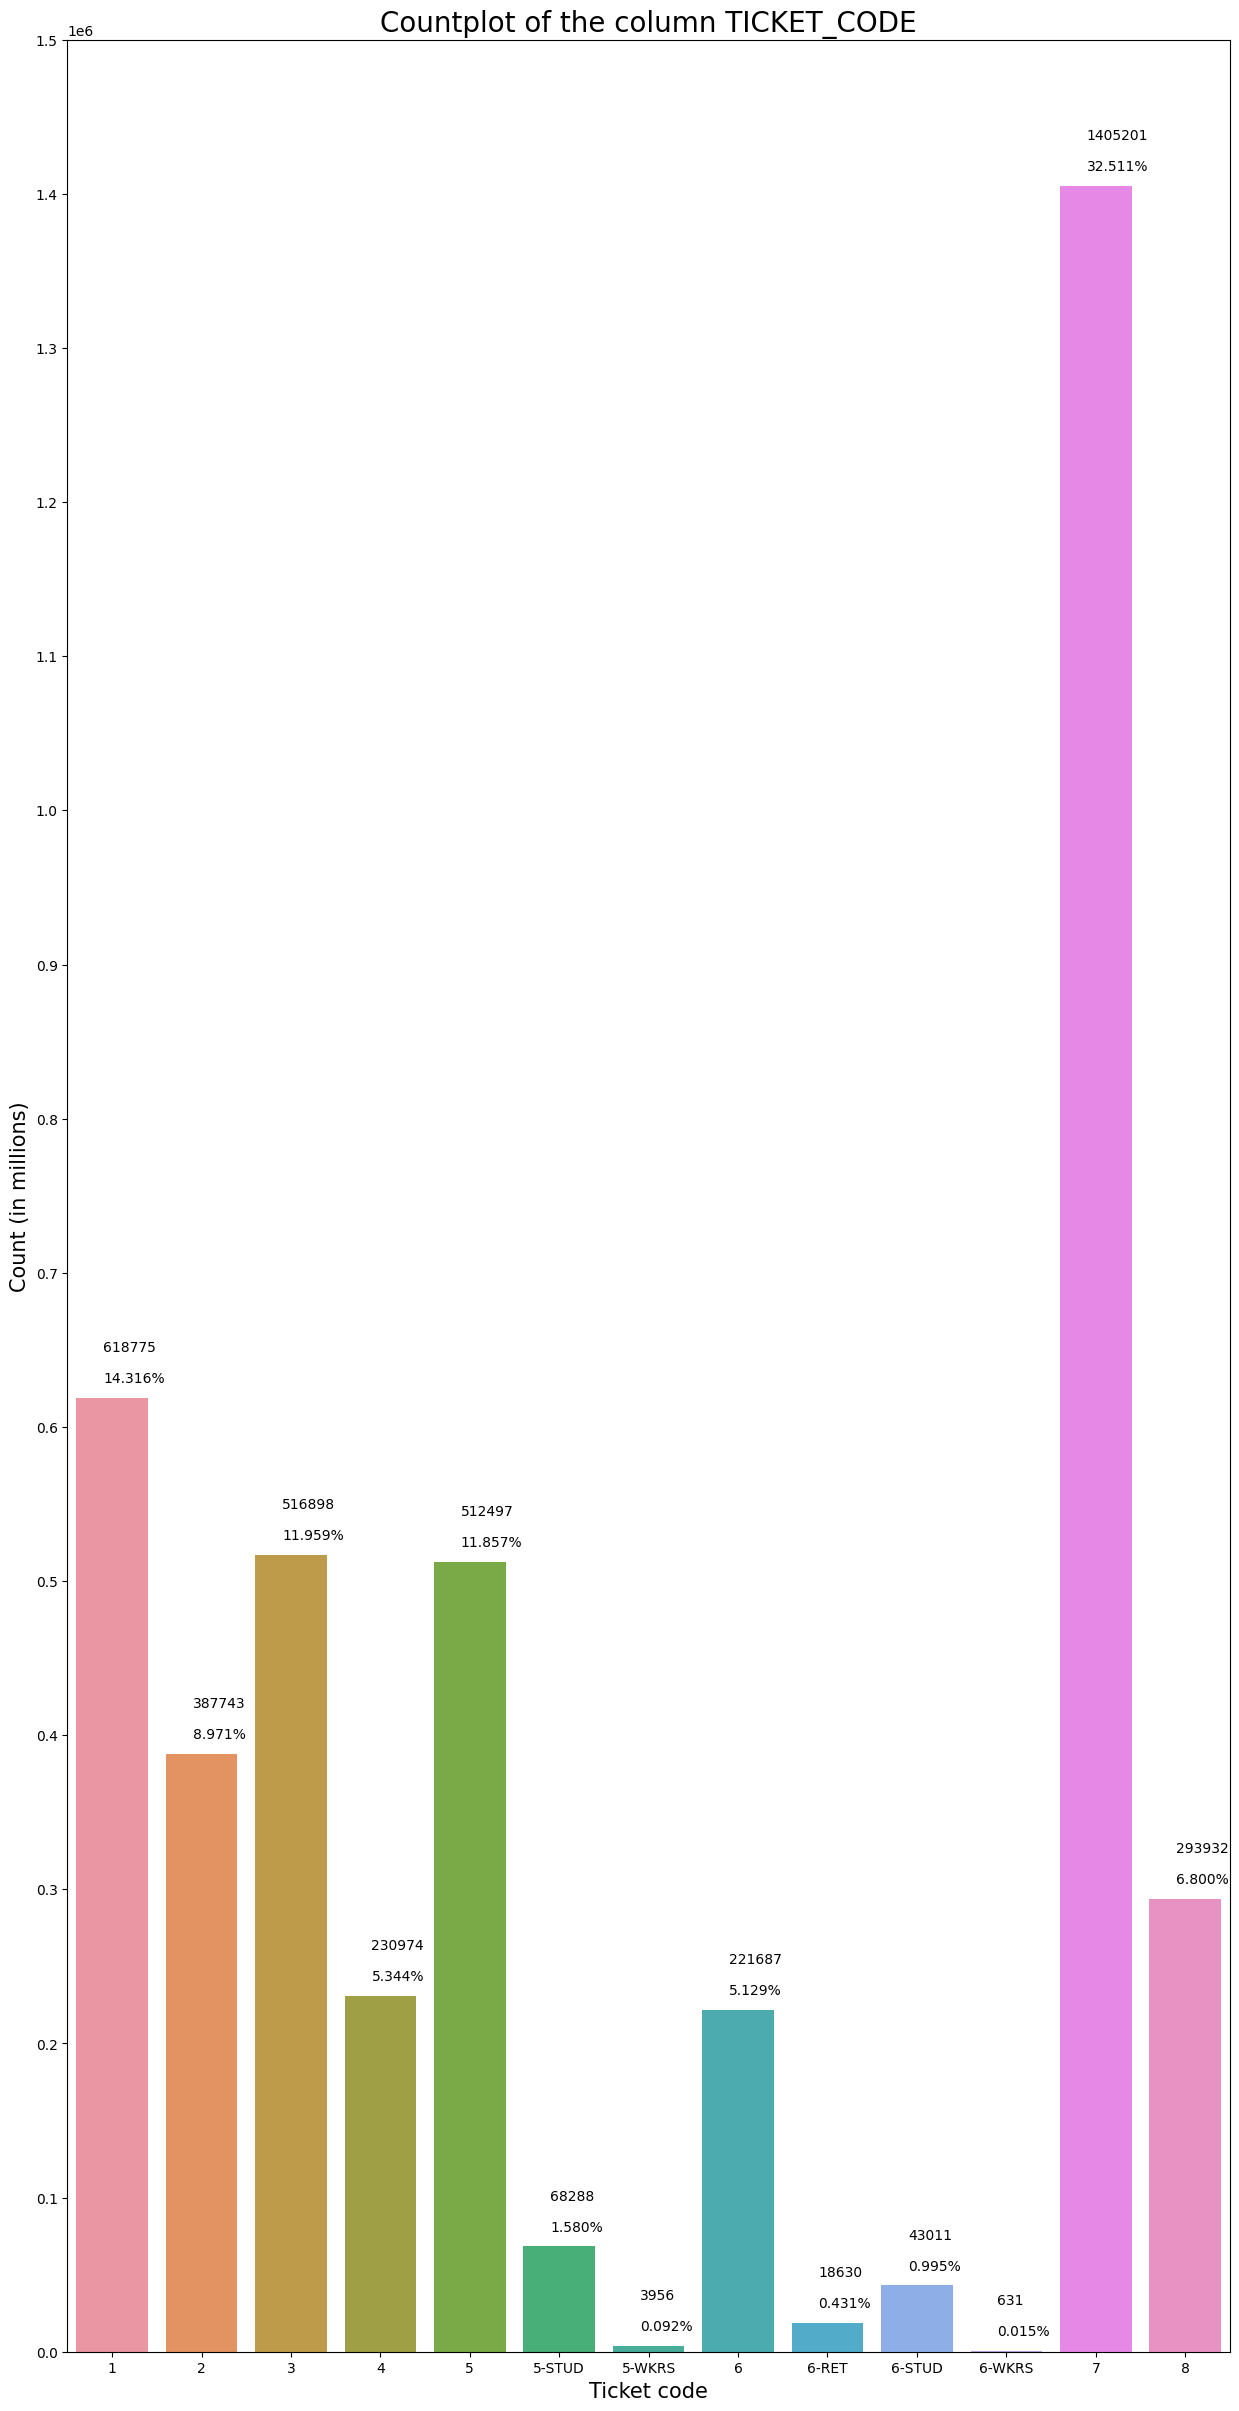

In [164]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

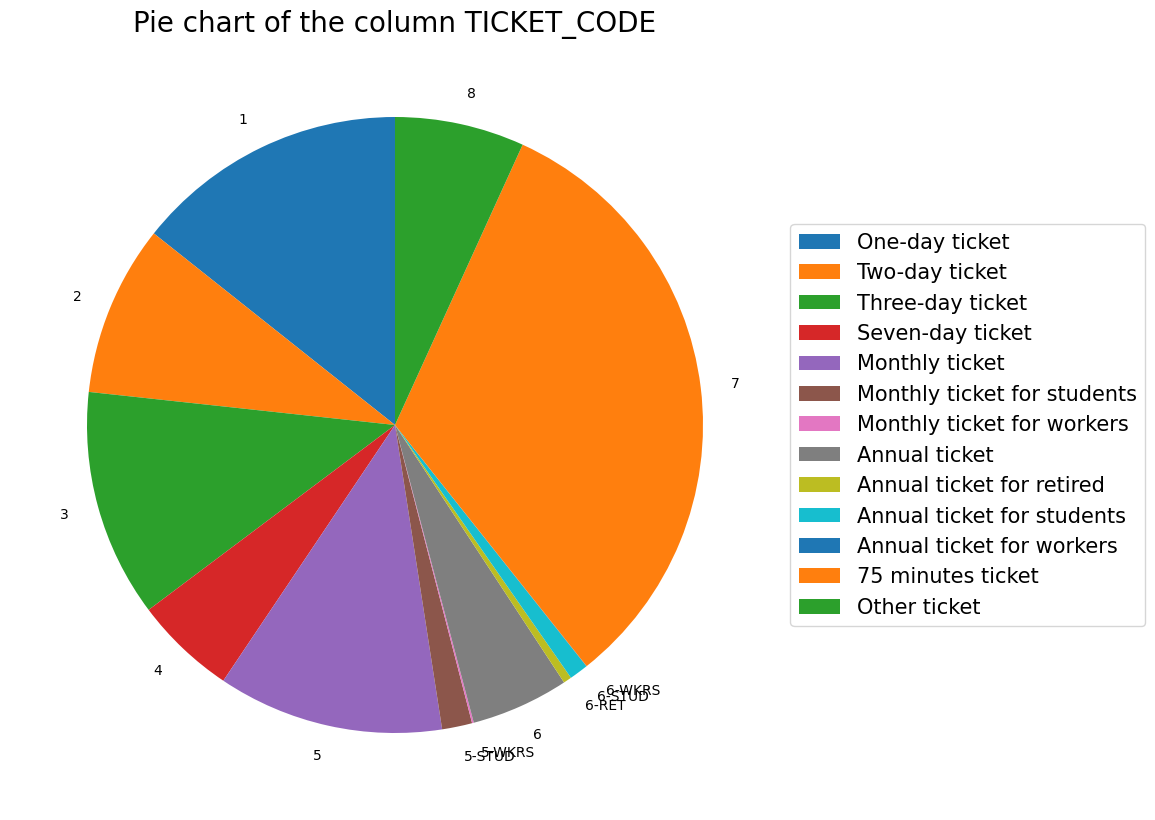

In [165]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(startangle=90)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 8 (other tickets) 

In [166]:
shape_before = df.shape[0]

# Delete 8 tickets because they are not useful for the analysis 
df = df[df['TICKET_CODE'] != '8']

# Print the number of rows before and after the deletion of the 8 tickets and the difference
print('The number of rows before the deletion of the 8 tickets is: {}'.format(shape_before))
print('The number of rows after the deletion of the 8 tickets is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))

# TODO: to de-comment later

The number of rows before the deletion of the 8 tickets is: 4322223
The number of rows after the deletion of the 8 tickets is: 4028291
The difference is: 293932


## Data Cleaning

### Similar stops

In [167]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

The number of unique values in the column DESCRIZIONE is: 795


In [168]:
def get_common_prefix(string_list):
    """
        This function returns the common prefix of a list of strings.
        If there is no common prefix, it returns an empty string.
        :param string_list: list of strings
        :return: string that is the common prefix of the list of strings
    """
    first_prefix = string_list[0].split(" ")[0]
    # Create and empty dictionary
    prefix_dict = {}

    # Iterate over the list of strings
    for string in string_list[1:]:
        # Check if the string starts with the first prefix
        if not string.startswith(first_prefix):
            # If the string does not start with the first prefix, split the string and take the first word
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict

In [169]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [170]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

GIUDECCA: ['GIUDECCA PAL']
P.LE: ['P.LE ROMA "E', 'P.LE ROMA "G', 'P.LE ROMA "C', 'P.LE ROMA "B', 'P.LE ROMA "D', 'P.LE ROMA "F']
AEROPORTO: ['AEROPORTO MA']
S.: ['S. MARCO-SAN', 'S. BASILIO', 'S. STAE', 'S. TOMA\' "B"', 'S. MARCUOLA-', 'S.ELENA-STAD', 'S. MARCO VAL', 'S. ANGELO', 'S. GIORGIO', 'S. ALVISE', 'S. PIETRO DI', 'S. MARTA', 'S. SILVESTRO', 'S. MARIA DEL', 'S. ERASMO CA', 'S. ERASMO PU', 'S. ERASMO CH', 'S. MARCO (GI', 'S. SERVOLO', 'S. SAMUELE', 'S. TOMA\' "A"', 'S. MARCO GIA']
LIDO: ['LIDO S.M.E. ', 'LIDO S. NICO']
GALILEI: ['GALILEI DARS']
VENEZIA: ['VENEZIA', 'VENEZIA CORS', 'VENEZIA RAMP', 'VENEZIA PIAZ']
PERTINI: ['PERTINI CHIE', 'PERTINI FOSC', 'PERTINI CARR', 'PERTINI GAVA', 'PERTINI VESP']
CA': ["CA' D'ORO", "CA' SABBIONI", "CA' ROSSA SE", "CA' ROSSA VO", "CA' ROSSA OB", "CA' REZZONIC", "CA' LIN ERAC", "CA' SOLARO C", "CA' ROSSA BI", "CA' MARCELLO", "CA' LIN PITA", "CA' LIN GATT", "CA' BIANCA L", "CA' LIN CAST", "CA' SOLARO P", "CA' BIANCA P", "CA' SOLARO O"]
RIALTO:

#### Update some keys in the dictionary

In [171]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [172]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

The values of the dictionary with the key S. are: ['S. MARCO-SAN', 'S. BASILIO', 'S. STAE', 'S. TOMA\' "B"', 'S. MARCUOLA-', 'S.ELENA-STAD', 'S. MARCO VAL', 'S. ANGELO', 'S. GIORGIO', 'S. ALVISE', 'S. PIETRO DI', 'S. MARTA', 'S. SILVESTRO', 'S. MARIA DEL', 'S. ERASMO CA', 'S. ERASMO PU', 'S. ERASMO CH', 'S. MARCO (GI', 'S. SERVOLO', 'S. SAMUELE', 'S. TOMA\' "A"', 'S. MARCO GIA']
The values of the dictionary with the key San are: ['SAN MARCO-SA', 'SANTA MARIA ', "SAN DONA' PA", "SANT'ANTONIO", "SAN DONA' RI", 'SAN MARCO MA', 'SAN MARCO SA', "SAN DONA' MA", "SAN DONA' PI", 'SAN MARCO CA', 'SAN MARCO FO', "SAN DONA' PE", 'SAN MARCO MO', 'SAN LIBERALE', "SAN NICOLO' ", 'SAN MARCO MU', "SAN DONA' CE", 'SAN MARCO BO', 'SANPIETRO CA', "SAN DONA' FA", 'SANTA MARGHE', "SAN DONA' VA", 'SAN ROCCO BR', "SAN NICOLO'", 'SANSOVINO VE', 'SAN PIETRO B', 'SAN PIETRO P', 'SANT´ANNA S', 'SAN PIETRO C', 'SAN TROVASO', "SANT'ANGELO ", 'SAN  GIUSEPP', 'SANDON', 'SANT ANGELO ']


##### S.Erasmo

In [173]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

The values of the dictionary with the key S.ERASMO are: ['S. ERASMO PU']


##### San Marco

In [174]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

The values of the dictionary with the key San Marco are: ['SAN MARCO-SA', 'SAN MARCO MA', 'SAN MARCO SA', 'SAN MARCO CA', 'SAN MARCO FO', 'SAN MARCO MO', 'SAN MARCO MU', 'SAN MARCO BO', 'S. MARCO (GI']


##### San Dona'

In [175]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

The values of the dictionary with the key San Dona are: ["SAN DONA' PA", "SAN DONA' RI", "SAN DONA' MA", "SAN DONA' PI", "SAN DONA' PE", "SAN DONA' CE", "SAN DONA' FA", "SAN DONA' VA"]


#### San Pietro

In [176]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

The values of the dictionary with the key San Pietro are: ['SANPIETRO CA', 'SAN PIETRO B', 'SAN PIETRO P', 'SAN PIETRO C', 'S. PIETRO DI']


#### Ca' Rossa

In [177]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

The values of the dictionary with the key Ca' Rossa are: ["CA' ROSSA SE", "CA' ROSSA VO", "CA' ROSSA OB", "CA' ROSSA BI"]


##### Manage the remaining values in the keys 'S.' and 'San' and others

In [178]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
# Remove the values from the keys as above

if 'S.' in dict_prefix:
    for value in dict_prefix['S.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('S.')

if 'SAN' in dict_prefix:
    for value in dict_prefix['SAN']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SAN')

if 'SANTA' in dict_prefix:
    for value in dict_prefix['SANTA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANTA')

if 'SANT\'' in dict_prefix:
    for value in dict_prefix['SANT\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANT\'')

if 'CA\'' in dict_prefix:
    for value in dict_prefix['CA\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('CA\'')

if 'PIAZZA' in dict_prefix:
    for value in dict_prefix['PIAZZA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZA')

if 'PIAZZALE' in dict_prefix:
    for value in dict_prefix['PIAZZALE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZALE')

if 'VIA' in dict_prefix:
    for value in dict_prefix['VIA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('VIA')

if 'STAZIONE' in dict_prefix:
    for value in dict_prefix['STAZIONE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('STAZIONE')

if 'TREVISO' in dict_prefix:
    for value in dict_prefix['TREVISO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TREVISO')

if 'TRENTO' in dict_prefix:
    for value in dict_prefix['TRENTO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TRENTO')

if 'INCR.' in dict_prefix:
    for value in dict_prefix['INCR.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('INCR.')

if 'DE' in dict_prefix:
    for value in dict_prefix['DE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('DE')

#### Treviso and Trento

In [179]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

The values of the dictionary with the key Tre are: ['TRE ARCHI', 'TREBASELEGHE']


#### Keys with only an item

In [180]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [181]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

LIDO: ['LIDO S.M.E. ', 'LIDO S. NICO']
VENEZIA: ['VENEZIA', 'VENEZIA CORS', 'VENEZIA RAMP', 'VENEZIA PIAZ']
PERTINI: ['PERTINI CHIE', 'PERTINI FOSC', 'PERTINI CARR', 'PERTINI GAVA', 'PERTINI VESP']
RIALTO: ['RIALTO "C"', 'RIALTO MERCA', 'RIALTO "D"', 'RIALTO "B"']
GALLO: ['GALLO GALOPP', 'GALLO DEI KI', 'GALLO CONTAR', 'GALLO LOREDA', 'GALLO DEI GI', 'GALLO GIOLIT', 'GALLO MOROSI', "GALLO SANT'A", 'GALLO BRAGAD', 'GALLO TORTA', 'GALLO BIBLIO', 'GALLO BARBAR']
PIAVE: ['PIAVE PODGOR', 'PIAVE PUCCIN', 'PIAVE FIUME']
GIARDINI: ['GIARDINI BIE', 'GIARDINI "B"']
ZATTERE: ['ZATTERE "B"', 'ZATTERE "A"']
MESTRE: ['MESTRE CENTR', 'MESTRE RAMPA', 'MESTRE PIAZZ', 'MESTRE STAZI', 'MESTRE VIA T', 'MESTRE VIA M', 'MESTRE VIA P', 'MESTRE VIA A', 'MESTRE VIA H']
TRONCHETTO: ['TRONCHETTO "', 'TRONCHETTO M', 'TRONCHETTO F', 'TRONCHETTO T', 'TRONCHETTO V']
BURANO: ['BURANO "A"', 'BURANO "C"', 'BURANO "B"']
CHIOGGIA: ['CHIOGGIA', 'CHIOGGIA VIA', 'CHIOGGIA PAR', 'CHIOGGIA STA', 'CHIOGGIA SAN', 'CHIOGGIA CAM'

In [182]:
# Export the dictionary in a json file
name_file = 'dict_prefix_' + file_name.split('.')[0] + '.json'
with open('data/dictionaries/' + name_file, 'w') as fp:
    json.dump(dict_prefix, fp)

### Useless stamps

In [183]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata
# DE-COMMENT THE FOLLOWING LINES OF CODE

In [184]:
# Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
dict_serial = {}
for ticket in df['TICKET_CODE'].unique():
    dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# Print the serial with the hightest number of validations, and the same for each ticket profile
for ticket in df['TICKET_CODE'].unique():
  print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

The serial with the hightest number of validations for the ticket profile 7 is: -2821794789
The serial with the hightest number of validations for the ticket profile 5 is: -2821768344
The serial with the hightest number of validations for the ticket profile 5-STUD is: -2854799481
The serial with the hightest number of validations for the ticket profile 6 is: -2821812278
The serial with the hightest number of validations for the ticket profile 6-STUD is: -2854805238
The serial with the hightest number of validations for the ticket profile 1 is: 41679521645592068
The serial with the hightest number of validations for the ticket profile 2 is: 40553662420107524
The serial with the hightest number of validations for the ticket profile 6-RET is: -4089257922
The serial with the hightest number of validations for the ticket profile 3 is: 40833121973593348
The serial with the hightest number of validations for the ticket profile 4 is: 65694110832425989
The serial with the hightest number of val

In [185]:
# Group by the serial and the fermata 
# df = df.groupby(['SERIALE', 'FERMATA']).apply(lambda x: x.sort_values(by='DATA_VALIDAZIONE', ascending=True))

# Print the first 5 rows of the df
# df.head()
# DO NOT DE-COMMENT THIS CELL

In [186]:
# Reset the index of the df and drop the old index in order to have a new index starting from 0 to the number of rows
# It is necessary to have a new index because the groupby function has created a multi-index
df.reset_index(drop=True, inplace=True)

In [187]:
# Create a new column 'MIN_TEMPORAL_GAP' that contains the minimum temporal gap between two validations for the same serial and fermata in minutes
df = df.groupby(['SERIALE','DATA', 'DESCRIZIONE']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))

KeyboardInterrupt: 

In [ ]:
df.head(20)

In [ ]:
df.tail(20)

In [ ]:
df['MIN_TEMPORAL_GAP'].value_counts()

In [ ]:
# How many rows have a minimum temporal gap equal to NaN?
df[df['MIN_TEMPORAL_GAP'].isna()].shape[0]

In [ ]:
# Cleaning operation: remove the rows using the minimum temporal gap

# Find a reasonable delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
# Print the minimum value of the column MIN_TEMPORAL_GAP
print('The minimum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].min()))

# Print the maximum value of the column MIN_TEMPORAL_GAP
print('The maximum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].max()))

# Print the mean value of the column MIN_TEMPORAL_GAP
print('The mean value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].mean()))

# Print the median value of the column MIN_TEMPORAL_GAP
print('The median value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].median()))

# Print the standard deviation of the column MIN_TEMPORAL_GAP
print('The standard deviation of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].std()))

# Print the 0.05th percentile of the column MIN_TEMPORAL_GAP
print('The 0.05th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.05)))

# Print the 0.10th percentile of the column MIN_TEMPORAL_GAP
print('The 0.10th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.10)))

# Print the 25th percentile of the column MIN_TEMPORAL_GAP
print('The 25th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.25)))

# Print the 75th percentile of the column MIN_TEMPORAL_GAP
print('The 75th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.75)))

# Print the 90th percentile of the column MIN_TEMPORAL_GAP
print('The 90th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.90)))

# Print the 95th percentile of the column MIN_TEMPORAL_GAP
print('The 95th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.95)))

# Print the 99th percentile of the column MIN_TEMPORAL_GAP
print('The 99th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.99)))

# Print the 99.9th percentile of the column MIN_TEMPORAL_GAP
print('The 99.9th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.999)))

# Decide the delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
delta = df['MIN_TEMPORAL_GAP'].quantile(0.1)
if delta == 0:
    delta = df['MIN_TEMPORAL_GAP'].quantile(0.25)
if delta == 0:
    delta = df['MIN_TEMPORAL_GAP'].median()
print('The delta of MIN_TEMPORAL_GAP is: {}'.format(delta))

In [ ]:
# Cleaning operation: remove the rows using the minimum temporal gap

# Save the number of rows before the cleaning operation
shape_before = df.shape[0]

# Delete the rows that have a minimum temporal gap for the same serial and fermata more than the delta calculated before.
# Do not remove the rows with NaN values because they are the first validations of the day of a specific serial and fermata usefull for the analysis
df = df[(df['MIN_TEMPORAL_GAP'] > delta) | (df['MIN_TEMPORAL_GAP'].isna())]

# Print the number of rows before and after the cleaning operation and the difference
print('The number of rows before the cleaning operation is: {}'.format(shape_before))
print('The number of rows after the cleaning operation is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))
# Calculate the percentage of rows that has just been deleted
print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df.shape[0])/shape_before*100, 2)))

In [ ]:
# Delete the column MIN_TEMPORAL_GAP because it is not useful anymore
df.drop('MIN_TEMPORAL_GAP', axis=1, inplace=True)

In [ ]:
# Create a new dataframe, copied from the original one
df_new = df.copy() 

# Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
for key, value in dict_prefix.items():
    df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# Print the head of the new dataframe
print(df_new.head())

# Export the new dataframe in a txt file
# The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
name_file = 'dataset_cleaned_' + file_name.split('.')[0] + '.txt'
df_new.to_csv('data/processed/' + name_file, sep='\t', index=False)

print('The script has finished')